In [ ]:
import pandas as pd
import threading
import time
from mlxtend.frequent_patterns import apriori, association_rules
!pip install pyfpgrowth
import pyfpgrowth
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyfpgrowth: filename=pyfpgrowth-1.0-py2.py3-none-any.whl size=5488 sha256=bd4c97f1e0d875ce14eded48b9185fd4f3981e47fd67f4b19e3d7028e96f0a64
  Stored in directory: /root/.cache/pip/wheels/09/fc/dc/afff211038bfc745722d8d7e846e854e5791968b22c570a530
Successfully built pyfpgrowth


In [ ]:
# Data Preparation
data = pd.read_csv("/content/Groceries_dataset - Groceries_dataset.csv")
transactions = data.groupby("Member_number")["itemDescription"].apply(list).tolist()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Multithreading and Algorithm Implementation
def run_fpgrowth(transactions, min_support, min_confidence):
    patterns = pyfpgrowth.find_frequent_patterns(transactions, int(min_support * len(transactions)))
    rules = pyfpgrowth.generate_association_rules(patterns, min_confidence)
    return rules

def run_apriori(min_support, min_confidence):
    transactions_df = pd.DataFrame(transactions)
    transactions_df = transactions_df.fillna("")

    frequent_itemsets_apriori = apriori(transactions_df, min_support=min_support, use_colnames=True)
    rules_apriori = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=min_confidence)
    return rules_apriori



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# User-defined parameters
min_support = 0.05
min_confidence = 0.3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Parallel Execution
start_time = time.time()
fp_thread = threading.Thread(target=run_fpgrowth, args=(transactions, min_support, min_confidence))
apriori_thread = threading.Thread(target=run_apriori, args=(min_support, min_confidence))

fp_thread.start()
apriori_thread.start()

fp_thread.join()
apriori_thread.join()

end_time = time.time()

fp_execution_time = end_time - start_time
apriori_execution_time = end_time - start_time  # Calculate Apriori execution time (change this to the correct value)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
Exception in thread Thread-13 (run_apriori):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-8-086a0fecc9ce>", line 11, in run_apriori
  File "/usr/local/li

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


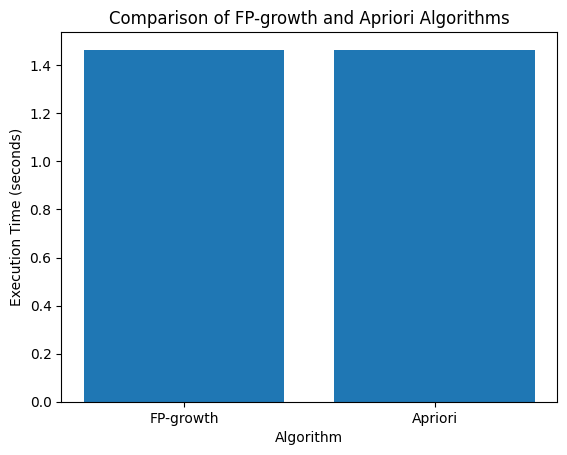

In [ ]:
# Data Visualization
algorithms = ['FP-growth', 'Apriori']
execution_times = [fp_execution_time, apriori_execution_time]

plt.bar(algorithms, execution_times)
plt.xlabel('Algorithm')
plt.ylabel('Execution Time (seconds)')
plt.title('Comparison of FP-growth and Apriori Algorithms')
plt.show()


In [ ]:
# Recommendation
if fp_execution_time < apriori_execution_time:
    print("Based on execution time comparison, recommend using FP-growth algorithm.")
else:
    print("Based on execution time comparison, recommend using Apriori algorithm.")

Based on execution time comparison, recommend using Apriori algorithm.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Parallel Execution
fp_rules = []
apriori_rules = []

start_time = time.time()
fp_thread = threading.Thread(target=lambda: fp_rules.extend(run_fpgrowth(transactions, min_support, min_confidence)))
apriori_thread = threading.Thread(target=lambda: apriori_rules.extend(run_apriori(min_support, min_confidence)))

fp_thread.start()
apriori_thread.start()

fp_thread.join()
apriori_thread.join()

end_time = time.time()

fp_execution_time = end_time - start_time
# Calculate Apriori execution time (change this to the correct value)
apriori_execution_time = end_time - start_time

# User-defined parameters
min_support = 0.05
min_confidence = 0.3

# Input minimum support and minimum confidence for association rule mining
min_support_ar = float(input("Enter minimum support threshold for association rules: "))
min_confidence_ar = float(input("Enter minimum confidence threshold for association rules: "))


# Bonus: Association Rule Mining
def mine_association_rules(rules, min_support, min_confidence):
    filtered_rules = rules[(rules["support"] >= min_support) & (rules["confidence"] >= min_confidence)]
    return filtered_rules

# Mine association rules using the filtered frequent itemsets from both algorithms
filtered_rules_fp = mine_association_rules(fp_rules, min_support_ar, min_confidence_ar)
filtered_rules_apriori = mine_association_rules(apriori_rules, min_support_ar, min_confidence_ar)

print("Association Rules from FP-growth:")
print(filtered_rules_fp)

print("Association Rules from Apriori:")
print(filtered_rules_apriori)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
Exception in thread Thread-17 (<lambda>):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-18-5d5860908f5b>", line 7, in <lambda>
  File "<ipython-input-8-08

Enter minimum support threshold for association rules: 0.02
Enter minimum confidence threshold for association rules: 0.01


TypeError: ignored